## Problem1

Build a CNN model on CIFAR-10 dataset by applying few regularization techniques like drop out and data augmentation

In [123]:
import tensorflow as tf

tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None)

False

In [124]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [125]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images.shape

(50000, 32, 32, 3)

In [126]:
test_images.shape

(10000, 32, 32, 3)

In [127]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [128]:
train_labels.shape

(50000, 1)

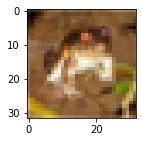

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,2))
plt.imshow(train_images[0])

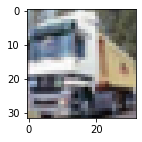

In [130]:
plt.figure(figsize=(15,2))
plt.imshow(train_images[1])

In [149]:
def view_image(x,y,index):
    labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(labels[y[index][0]])

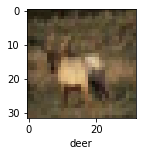

In [150]:
view_image(train_images,train_labels,3)

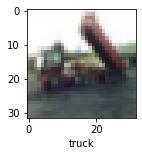

In [151]:
view_image(train_images,train_labels,2)

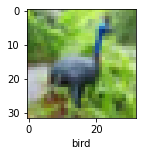

In [152]:
view_image(train_images,train_labels,6)

In [136]:
from tensorflow.keras import layers
from tensorflow.keras import models
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [139]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [143]:
cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9771 - accuracy: 0.6622
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9426 - accuracy: 0.6746
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9292 - accuracy: 0.6793
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9096 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8883 - accuracy: 0.6950
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8727 - accuracy: 0.7003
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8558 - accuracy: 0.7049
Epoch 8/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8449 - accuracy: 0.7106
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8268 - accuracy: 0.7139
Epoch 10/10
1563/1563 [==============================] - 71s 46m

In [154]:
cnn.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 1.3844 - accuracy: 0.6020


[1.3843954801559448, 0.6019999980926514]

In [155]:
y_pred = cnn.predict(test_images)
y_pred[:5]

array([[5.7640143e-02, 5.3548437e-02, 9.5100388e-02, 3.6738986e-01,
        6.9907248e-02, 1.1720750e-01, 7.3386513e-02, 3.0661177e-02,
        7.9873703e-02, 5.5285100e-02],
       [2.6593187e-03, 9.3888693e-06, 9.1931021e-08, 6.4788690e-09,
        2.5083167e-12, 2.4417005e-13, 5.8319257e-18, 5.0146973e-18,
        9.9728501e-01, 4.6169407e-05],
       [1.4378867e-01, 5.6656204e-02, 6.4471141e-03, 5.3889644e-03,
        9.7280950e-04, 5.1327859e-04, 4.9246813e-04, 7.9287244e-03,
        1.8061155e-01, 5.9720016e-01],
       [7.4103379e-01, 3.6614033e-04, 1.9663192e-02, 7.6376600e-03,
        4.5788935e-03, 3.0998435e-04, 4.6572430e-04, 1.8055837e-03,
        2.0511639e-01, 1.9022549e-02],
       [2.3666908e-05, 6.3302205e-06, 2.2344505e-02, 2.7016014e-01,
        1.4530428e-01, 1.8498188e-01, 3.7466872e-01, 2.4994330e-03,
        8.6020532e-07, 1.0123462e-05]], dtype=float32)

In [156]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

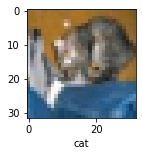

In [157]:
#predict
#labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
view_image(test_images,test_labels,0)

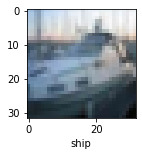

In [161]:
view_image(test_images,test_labels,2)

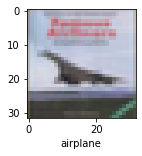

In [162]:
view_image(test_images,test_labels,3)